| Column Names|Description| Data Type|
|-------------|-----------|----------|
|Gender|Whether the customer is a male or a female|
|SeniorCitizen|Whether a customer is a senior citizen or not|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|Tenure|Number of months the customer has stayed with the company|
|Phone Service|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not|
|InternetService|Customer's internet service provider (DSL, Fiber Optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No Internet)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No Internet)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service)|
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No Internet service)|
|Contract|The contract term of the customer (Month-to-Month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|Payment Method|The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|


In [1]:
#import all necessary libraries

# data manipulation
import pandas as pd
import numpy as np
import missingno

# data visualization libraries
import matplotlib.pyplot as plt
from plotly import express as px
import seaborn as sns

# statistical libraries
from scipy import stats
import statistics as stat

# database manipulation libraries
import pyodbc
from dotenv import dotenv_values

# hide warnings
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
 

In [2]:
# load environment variables
environment_variables = dotenv_values(".env")

# load database configurations
database = environment_variables.get("DB_NAME")
server = environment_variables.get("SERVER_NAME")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

# database connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"


In [3]:
# create pyodbc connector
connection = pyodbc.connect(connection_string)

In [4]:
# Loading first dataset from MS SQL server
query_one = " SELECT * FROM dbo.LP2_Telco_churn_first_3000"
df_1 = pd.read_sql(query_one,connection)
df_1.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.50,False


In [5]:
# load second dataset
df_2 = pd.read_csv("LP2_Telco-churn-second-2000.csv")
df_2.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.5,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.0,1046.5,Yes


In [6]:
# load third dataset
df_3 = pd.read_excel("Telco-churn-last-2000.xlsx")
df_3.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8


In [7]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [8]:
def unique_val_check(df):
    for col in df.columns:
        if ((df[col].dtype == 'object') or (df[col].dtype == 'bool')) and (col != 'customerID'):
            print(col, '----->', df[col].unique())

In [9]:
unique_val_check(df_1)

gender -----> ['Female' 'Male']
SeniorCitizen -----> [False  True]
Partner -----> [ True False]
Dependents -----> [False  True]
PhoneService -----> [False  True]
MultipleLines -----> [None False True]
InternetService -----> ['DSL' 'Fiber optic' 'No']
OnlineSecurity -----> [False True None]
OnlineBackup -----> [True False None]
DeviceProtection -----> [False True None]
TechSupport -----> [False True None]
StreamingTV -----> [False True None]
StreamingMovies -----> [False True None]
Contract -----> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling -----> [ True False]
PaymentMethod -----> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn -----> [False True None]


In [10]:
unique_val_check(df_2)

gender -----> ['Male' 'Female']
Partner -----> ['No' 'Yes']
Dependents -----> ['No' 'Yes']
PhoneService -----> ['Yes' 'No']
MultipleLines -----> ['No' 'No phone service' 'Yes']
InternetService -----> ['DSL' 'Fiber optic' 'No']
OnlineSecurity -----> ['No' 'Yes' 'No internet service']
OnlineBackup -----> ['No' 'Yes' 'No internet service']
DeviceProtection -----> ['No' 'Yes' 'No internet service']
TechSupport -----> ['Yes' 'No' 'No internet service']
StreamingTV -----> ['No' 'Yes' 'No internet service']
StreamingMovies -----> ['No' 'Yes' 'No internet service']
Contract -----> ['Month-to-month' 'Two year' 'One year']
PaperlessBilling -----> ['Yes' 'No']
PaymentMethod -----> ['Credit card (automatic)' 'Electronic check' 'Mailed check'
 'Bank transfer (automatic)']
TotalCharges -----> ['312.7' '1046.5' '2960.1' ... '346.45' '306.6' '6844.5']
Churn -----> ['No' 'Yes']


In [11]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [12]:
df_2.MonthlyCharges.unique()

array([ 49.5 ,  55.  ,  43.95, ...,  78.7 ,  60.65, 103.2 ])

In [13]:
train_df = pd.concat([df_1,df_2])
train_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [15]:


def modify_column_names(df):

    rename_columns= {
    "customerID":"customerId",
    "StreamingTV":"StreamingTv"
    }
    df=df.rename(columns=rename_columns) 

    modified_columns = []
    for column in df.columns:
        modified_column = ''
        for char in column:
            if char.isupper():
                modified_column += '_' + char
            else:
                modified_column += char
        modified_columns.append(modified_column.lstrip('_'))
    df.columns = modified_columns

    df= df.rename(columns=lambda x: x.lower()) 
    return df



In [16]:

train_df = modify_column_names(train_df)

<Axes: >

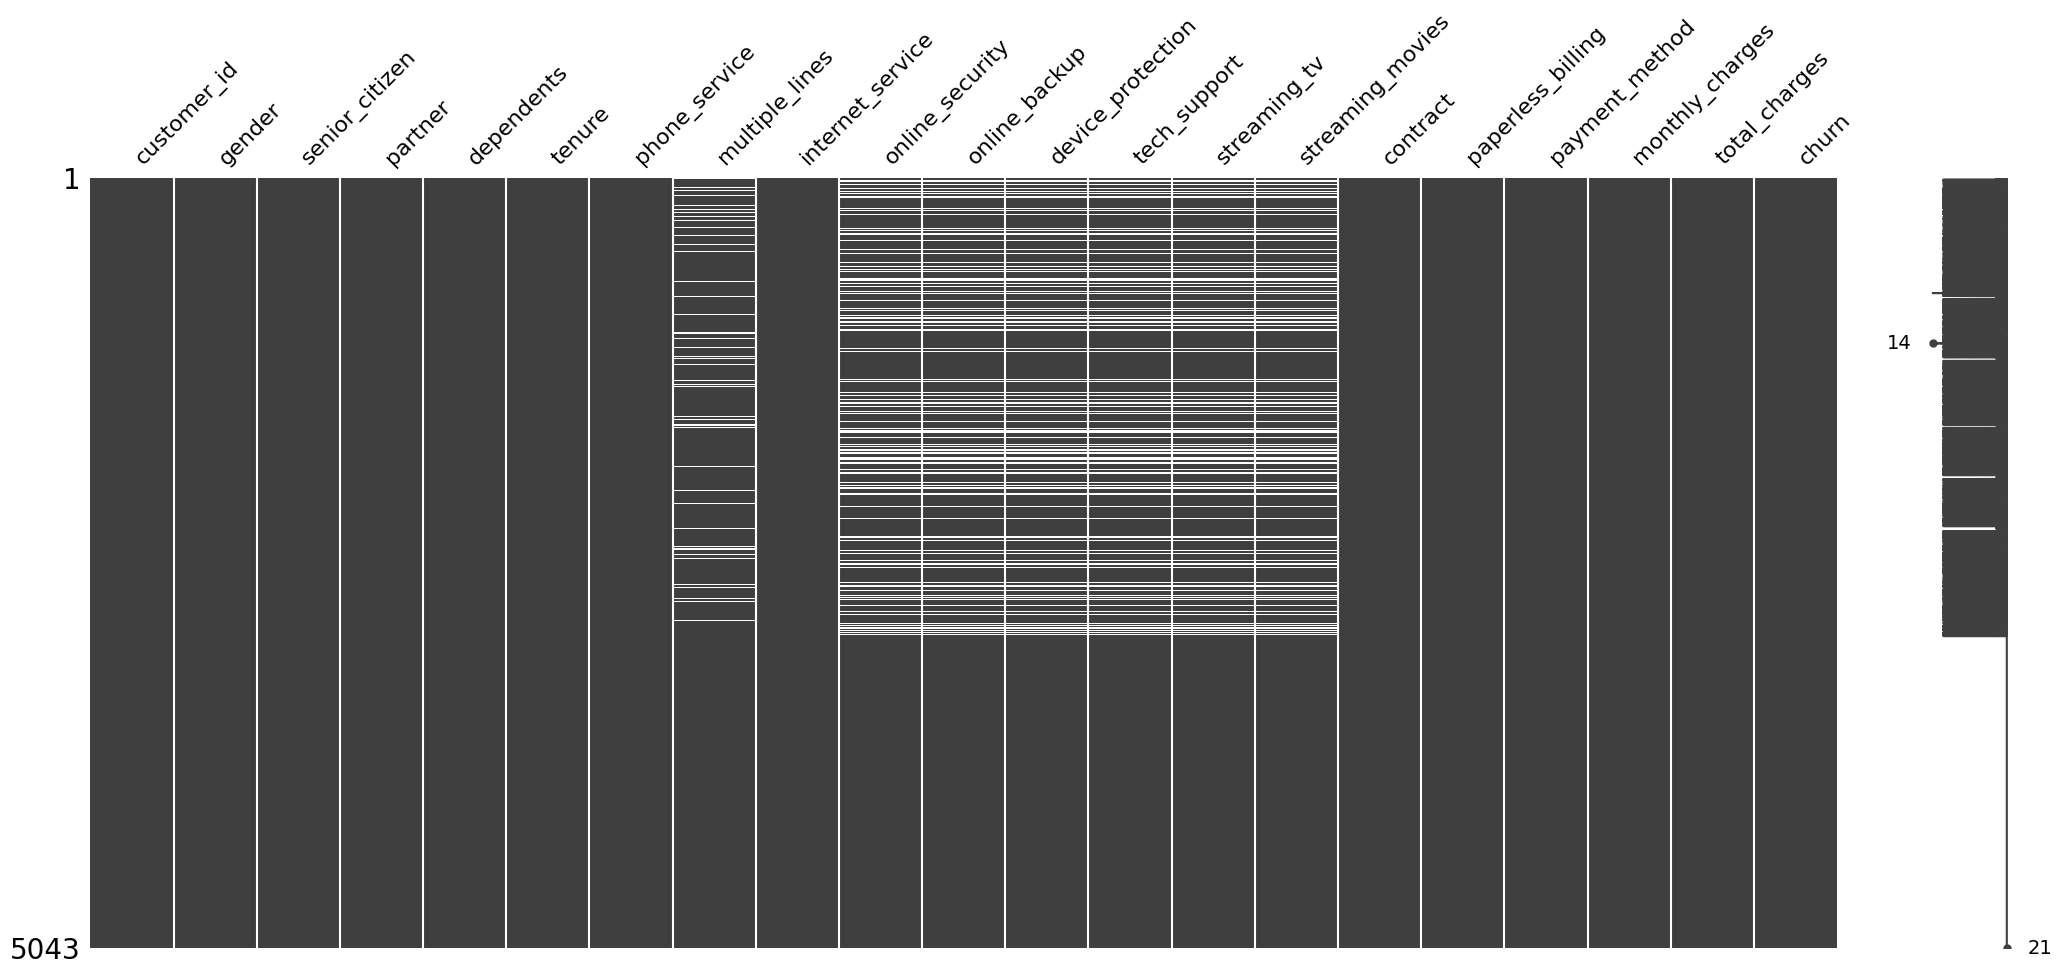

In [17]:
missingno.matrix(train_df)

In [18]:
train_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,5043,5043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,5043,2,Male,2559,NaN,NaN,NaN,NaN,NaN,NaN,NaN
senior_citizen,5043.0,NaN,NaN,NaN,0.162403,0.368857,0.0,0.0,0.0,0.0,1.0
partner,5043,4,False,1538,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dependents,5043,4,False,2070,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,5043.0,NaN,NaN,NaN,32.576641,24.529807,0.0,9.0,29.0,56.0,72.0
phone_service,5043,4,True,2731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
multiple_lines,4774,5,False,1437,NaN,NaN,NaN,NaN,NaN,NaN,NaN
internet_service,5043,3,Fiber optic,2248,NaN,NaN,NaN,NaN,NaN,NaN,NaN
online_security,4392,5,False,1478,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        5043 non-null   object 
 1   gender             5043 non-null   object 
 2   senior_citizen     5043 non-null   int64  
 3   partner            5043 non-null   object 
 4   dependents         5043 non-null   object 
 5   tenure             5043 non-null   int64  
 6   phone_service      5043 non-null   object 
 7   multiple_lines     4774 non-null   object 
 8   internet_service   5043 non-null   object 
 9   online_security    4392 non-null   object 
 10  online_backup      4392 non-null   object 
 11  device_protection  4392 non-null   object 
 12  tech_support       4392 non-null   object 
 13  streaming_tv       4392 non-null   object 
 14  streaming_movies   4392 non-null   object 
 15  contract           5043 non-null   object 
 16  paperless_billing  5043 non-n

In [20]:
# Convert column to numeric with errors='coerce
train_df['total_charges'] = pd.to_numeric(train_df['total_charges'], errors='coerce')

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        5043 non-null   object 
 1   gender             5043 non-null   object 
 2   senior_citizen     5043 non-null   int64  
 3   partner            5043 non-null   object 
 4   dependents         5043 non-null   object 
 5   tenure             5043 non-null   int64  
 6   phone_service      5043 non-null   object 
 7   multiple_lines     4774 non-null   object 
 8   internet_service   5043 non-null   object 
 9   online_security    4392 non-null   object 
 10  online_backup      4392 non-null   object 
 11  device_protection  4392 non-null   object 
 12  tech_support       4392 non-null   object 
 13  streaming_tv       4392 non-null   object 
 14  streaming_movies   4392 non-null   object 
 15  contract           5043 non-null   object 
 16  paperless_billing  5043 non-n

In [22]:
train_df.duplicated().sum()

0

In [23]:
train_df.isnull().sum()

customer_id            0
gender                 0
senior_citizen         0
partner                0
dependents             0
tenure                 0
phone_service          0
multiple_lines       269
internet_service       0
online_security      651
online_backup        651
device_protection    651
tech_support         651
streaming_tv         651
streaming_movies     651
contract               0
paperless_billing      0
payment_method         0
monthly_charges        0
total_charges          8
churn                  1
dtype: int64

<Axes: >

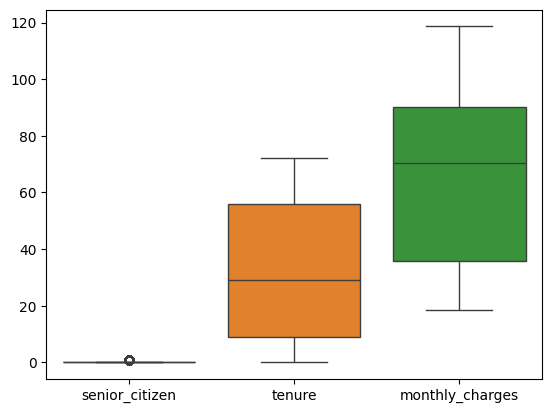

In [27]:
sns.boxplot(train_df.drop(['total_charges'], axis=1))

array([[<Axes: title={'center': 'senior_citizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'monthly_charges'}>,
        <Axes: title={'center': 'total_charges'}>]], dtype=object)

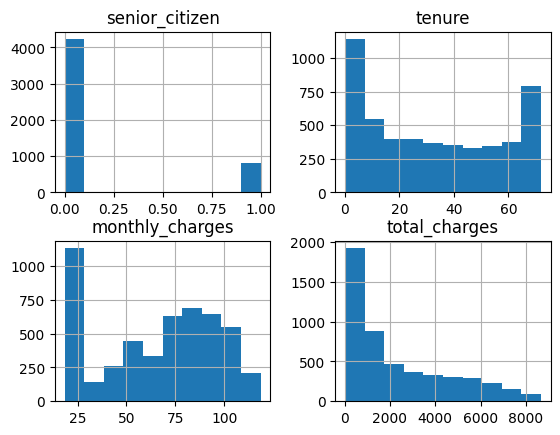

In [25]:
train_df.hist()

In [35]:
train_df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn'],
      dtype='object')